<a href="https://colab.research.google.com/github/Melikakmm/CLPBgroup17/blob/main/ASSIGNMENT_2/Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten #, Reshape
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

%run /content/plot.py

<Figure size 432x288 with 0 Axes>

### Read data

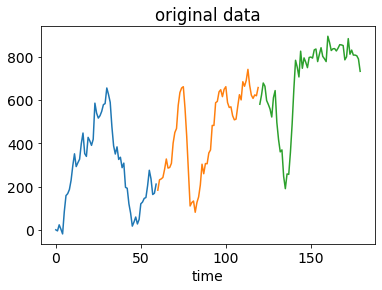

data:  10000


In [ ]:
str0 = 'ts_L60_Z12_A500_DX50_bias5_N10000.dat'
fnamex='DATA/x_'+str0
fnamey='DATA/y_'+str0

x = np.loadtxt('/content/x_ts_L60_Z12_A500_DX50_bias5_N10000.dat', delimiter=" ",dtype=float)
N,L = len(x), len(x[0])

Show_data(x,L,"original data")

categ = np.loadtxt('/content/y_ts_L60_Z12_A500_DX50_bias5_N10000.dat', dtype=int)
n_class = 3    # y.argmax() - y.argmin() +1
print('data: ',N)

y = np.zeros((N,n_class))
for i in range(N):
    y[i][categ[i]] = 1.

### Rescale data, split train/val.

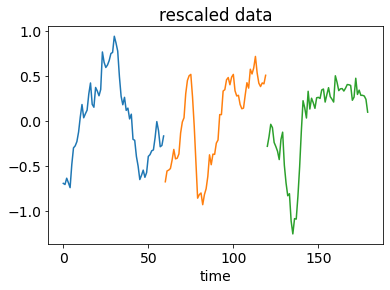

N_train= 8000   N_val= 2000   L= 60   n_class= 3


In [ ]:
#
#  FIRST PASSAGE:  DO NOT DO THIS --> FAILURE 
#
#remove average value of each sample from its values
xm = x.mean(axis=1)
for i in range(N):
    x[i] = x[i]-xm[i]

#
#  SECOND PASSAGE:  DO NOT DO THIS --> ALSO FAILURE 
#
#rescale (crude version, variance should be used)
x = x/400
    
Show_data(x,L,"rescaled data")

perc_train=0.8
N_train = int(perc_train*N)
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]
N_val = len(x_val)
print('N_train=',N_train,'  N_val=',N_val,'  L=',L,'  n_class=',n_class)

#x_train=x_train.astype("float32")
#y_train=y_train.astype("float32")
#x_val=x_val.astype("float32")
#y_val=y_val.astype("float32")

# Keras wants an additional dimension with a 1 at the end
x_train = x_train.reshape(x_train.shape[0], L, 1)
x_val =  x_val.reshape(x_val.shape[0], L, 1)
input_shape = (L, 1)

## Convolutional NN

In [ ]:
from typing import Any
from matplotlib.font_manager import afmFontProperty

from keras.backend import clear_session

np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)


L = [0, 1, 10e-2, 10e-3, 10e-4, 10e-5]

def Rgul(l,case):
  if case == 1:
    reg = tf.keras.regularizers.l1(l)
    return reg
  elif case == 2:
    reg = tf.keras.regularizers.l2(l)
    return reg
  elif case == 3:
    reg = tf.keras.regularizers.l1_l2(l)
    return reg




NF = 5
nepoch = 400
ini = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05,seed=None)
opt = tf.keras.optimizers.Adam()
def create_model(l, case, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu'):
    
    if MODEL == 1 :
        model = Sequential()
        model.add(Conv1D(filters=NF, kernel_size=11, 
                     kernel_initializer=ini, 
                     kernel_regularizer=Rgul(l, case),
                     activation='relu', 
                     input_shape=input_shape))
        model.add(AveragePooling1D(5))
        model.add(Conv1D(filters=5, kernel_size=7, activation='relu'))
        model.add(Flatten())
        model.add(Dense(12, activation='relu'))
        model.add(Dropout(0.2))
    if MODEL == 2 :
        model.add(Conv1D(filters=NF, kernel_size=11, 
                     kernel_initializer=ini, 
                     kernel_regularizer=Rgul(l, case), 
                     activation='relu', input_shape=input_shape))
        model.add(AveragePooling1D(5))
        model.add(Flatten())
        model.add(Dense(9, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(6, activation='relu'))
        model.add(Dropout(0.2))
    model.add(Dense(n_class, activation='softmax'))
    model.compile(loss= keras.losses.categorical_crossentropy,
                  optimizer = opt,
                  metrics = ['accuracy'])
    


    return model



In [ ]:


#creating model with different regulaization models



#case 1(l1)

model_0_1= create_model(0, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_1_1= create_model(10e-0, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_2_1 = create_model(10e-2, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_3_1 = create_model(10e-3, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_4_1 = create_model(10e-4, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_5_1 = create_model(10e-5, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')

#case 2(l2)

model_0_2= create_model(0, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_1_2= create_model(10e-0, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_2_2 = create_model(10e-2, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_3_2 = create_model(10e-3, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_4_2 = create_model(10e-4, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_5_2 = create_model(10e-5, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')

#case 3(l1_l2)

model_0_3= create_model(0, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_1_3= create_model(10e-0, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_2_3 = create_model(10e-2, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_3_3 = create_model(10e-3, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_4_3 = create_model(10e-4, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')
model_5_3 = create_model(10e-5, 1, MODEL = 1,  optimizer = "adam", dropout = 0.2,
                 activation_hidden_layers = 'relu')

In [ ]:
from keras import layers
C = [1, 2, 3]

for case in C :
  for l in L :
    globals()['model_{}_{}'.format(L.index(l), case)].layers


In [ ]:
def Show_weights(model,ly=0,label="model"):
    c=['r','y','c','b','m']
    m=['o','s','D','<','>']
    ms=10
    
    w = model.layers[ly].get_weights()[0]
    wT=w.T
    M=len(wT)
    b = model.layers[ly].get_weights()[1]
    
    fig,AX=plt.subplots(1,2,figsize=(10,4))
    ax=AX[0]
    ax.axhline(0, c="k")
    ax.plot((0,))
    for i in range(M):
        ax.plot(wT[i][0],"-",c=c[i],marker=m[i],label=str(i),markersize=ms)
    ax.set_title(label+': filters of layer '+str(ly)+',Lambda:'+str(l))
    ax.set_xlabel('index')
    ax=AX[1]
    ax.axhline(0, c="k")
    for i in range(M):
        ax.plot((i),(b[i]),c=c[i],marker=m[i],label="filter "+str(i),markersize=ms)
    ax.set_title(label+': bias of layer '+str(ly)+',Lambda:'+str(l))
    ax.set_xlabel('filter nr')
    ax.set_xticks(np.arange(5))
    ax.legend()
    plt.show()
    


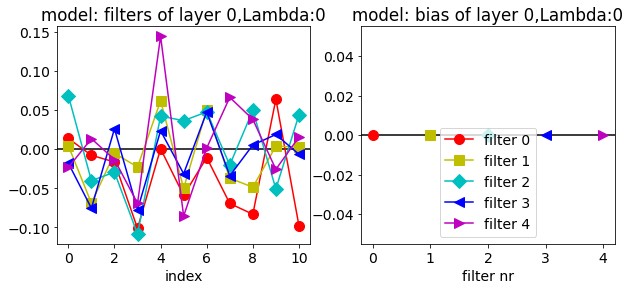

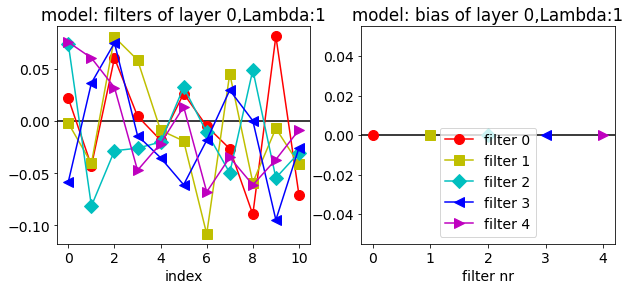

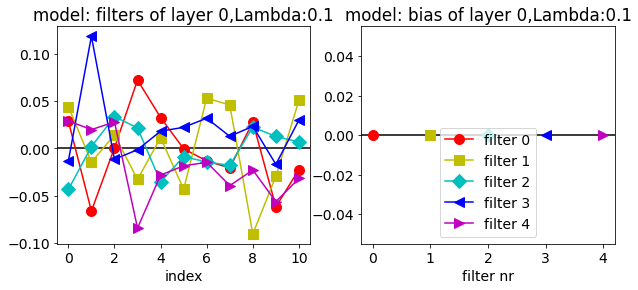

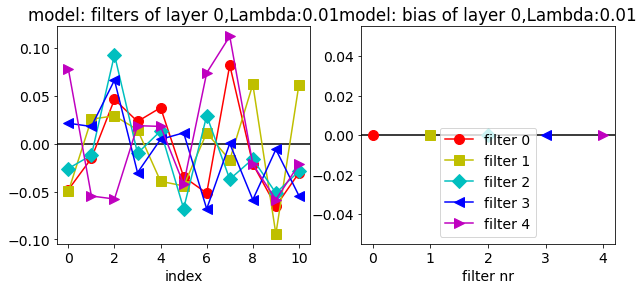

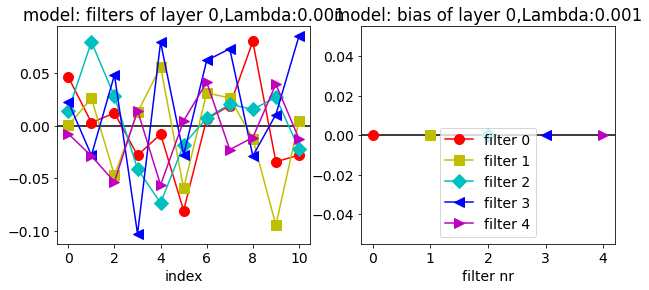

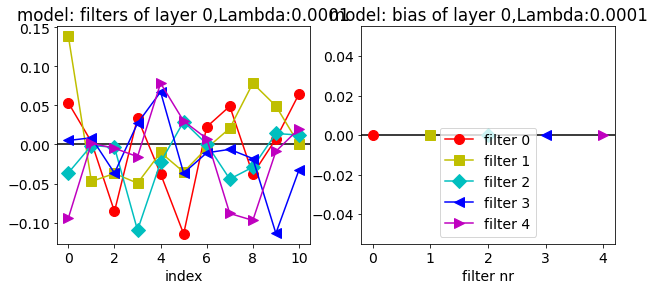

In [ ]:
#case 1(LASSO)

for l in L:
  Show_weights(globals()['model_{}_1'.format(L.index(l))], 0)

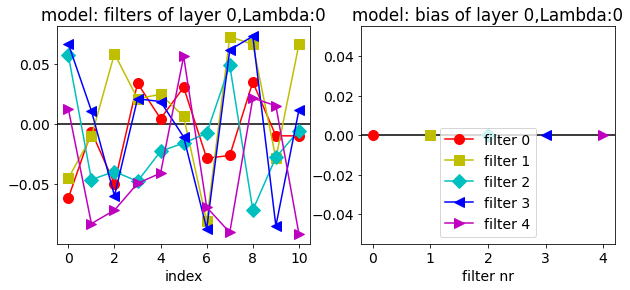

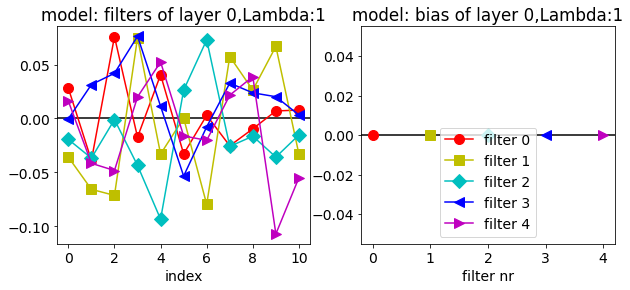

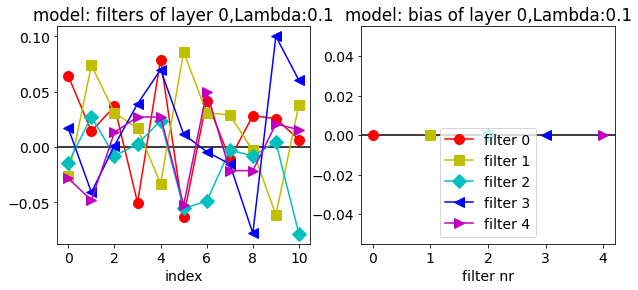

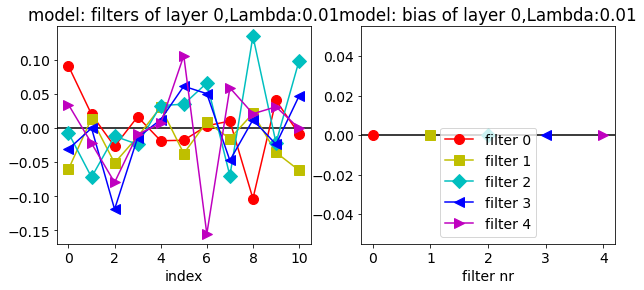

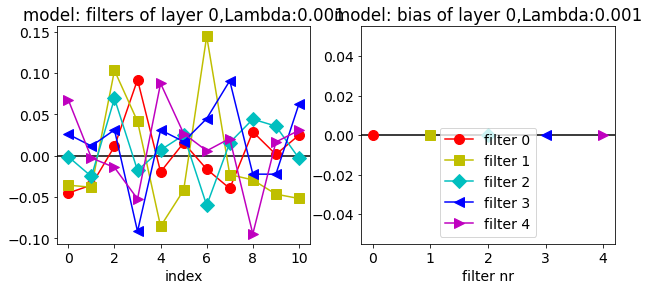

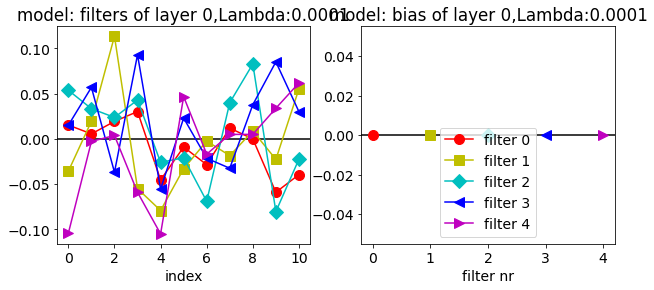

In [ ]:
#case 2(Ridge)


for l in L:
  Show_weights(globals()['model_{}_2'.format(L.index(l))], 0)

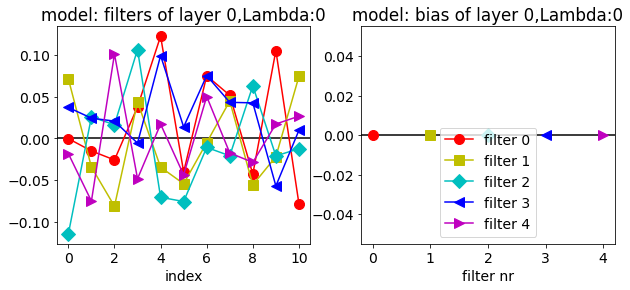

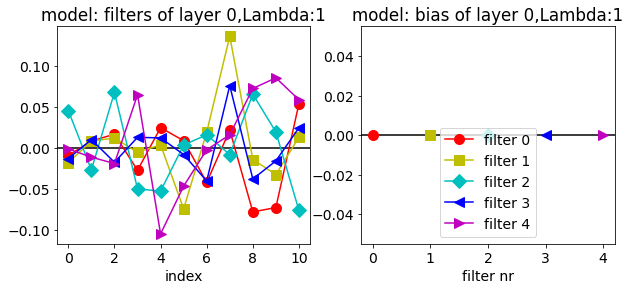

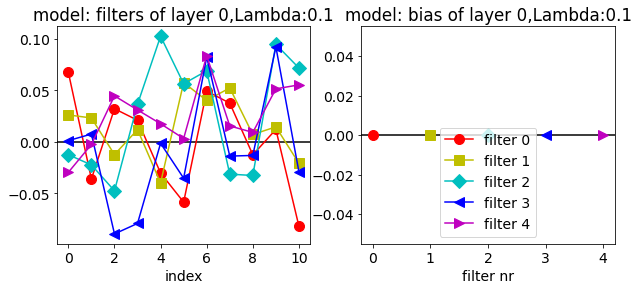

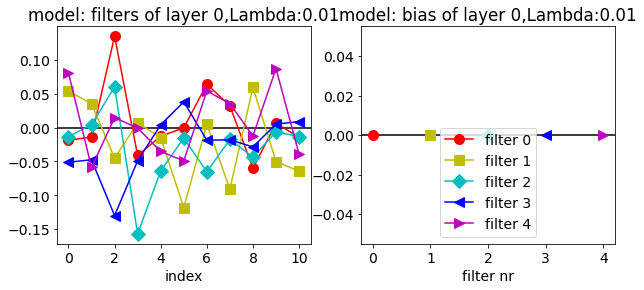

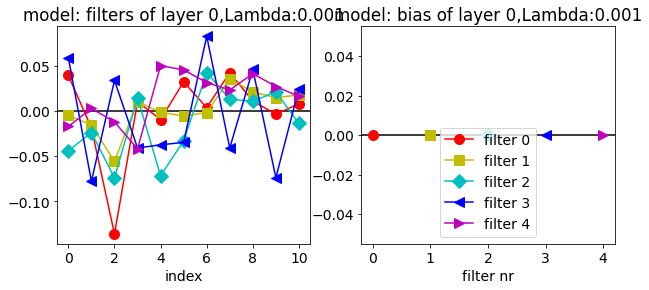

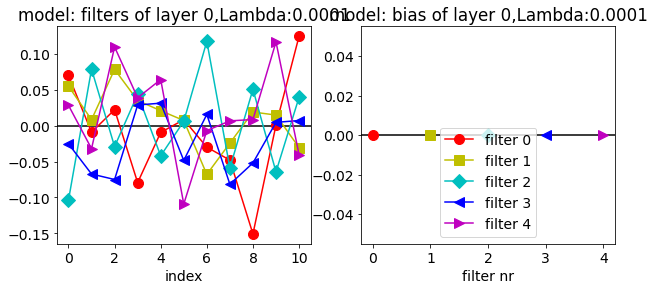

In [ ]:
#case 3(mixed)

for l in L:
  Show_weights(globals()['model_{}_3'.format(L.index(l))], 0)